# Monte Carlo estimation

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

**Problem 4a (Monte Carlo volume estimation).** In this problem our goal is to estimate the area of a unit disk. To this end, implement in Python a function that for a given $N$:
 * Uniformly samples $N$ points in a $[-1,1]\times[-1,1]$ square.
 * For each sampled point checks whether or not it lies inside a unit disk, let $X$ be the number of points inside.
 * Returns the ratio $AX/N$ (where $A=4$ is the area of the square).

Then:
 * Run your function $1000$ times for $N=1000$ and draw a histogram of the estimates.
 * What is the expected value $E(AX/N)$? What is the standard deviation?
 * Repeat the experiment, but this time sample from $[-10,10]\times[-10,10]$. Again draw a histogram, and compute the moments. Discuss the results.

**Remark:** Since we know how to compute the area of a unit disk, this exercise seems rather pointless. However, note that the exact same procedure can be used to estimate the $n$-dimensional volume of any body $S$ provided that:
 * We have a black-box that tells us whether or not a given point is in $S$.
 * We know $M$ such that $S \subseteq [-M,M]^n$ (or more generally we know a set $T$ such that we can sample uniformly from $T$ and know the volume of $T$).
 * The ratio of the volume of $S$ to the volume of $[-M,M]^n$ (or $T$) is not too small.

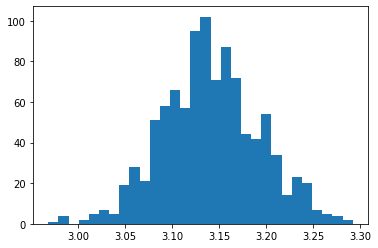

In [3]:
r = 1
N = 1000
A = 4


def rand_coord():
    return random.uniform(-1, 1)


def rand_point():
    return rand_coord(), rand_coord()


def check(x, y):
    return x ** 2 + y ** 2 <= r ** 2


def count():
    inside = sum(check(*rand_point()) for i in range(N))
    
    return A * inside / N


res = [count() for i in range(N)]

plt.hist(res, bins=30)
plt.show()

**Problem 4b (Monte Carlo integration).** In this problem our goal is to compute the value of a definite integral using random sampling. Let $f:[-1,1]\rightarrow\mathbb{R}$ be defined as $f(x) = 2\sqrt{1-x^2}$. Implement a Python function that for a given $N$:
 * Uniformly samples $N$ points $x_1,\ldots,x_N$ in $[-1,1]$.
 * Computes an estimate of $\int_{-1}^1 f(x)dx$ using $f(x_1),\ldots,f(x_N)$. As a part of this task you need to find a *reasonable* way to do this and argue why it works (formal proof is not required).

What is the variance and the standard deviation of your method? (This part is not required to pass the task, but please do try to figure it out!)

How is this task related to the previous one? (As above)

**Remark:** Again, the specific problem we are solving is really simple. But our method works for any function, in particular for functions $f:\mathbb{R}^n \rightarrow \mathbb{R}$. When $n$ is large, the standard quadrature-based integration breaks, but Monte Carlo approach in general still works (depending on $f$ additional variance-reducing tricks might be necessary, we will see one in the next problem).

In [5]:
N = 1000


def f(x):
    return 2 * math.sqrt(1 - x ** 2)


def calc_f():
    return f(random.uniform(-1, 1))


avr = sum(calc_f() for i in range(N)) / N

print(2 * avr)

3.1445068351684466


**Problem 4c (Monte Carlo counting).** Consider the following problem: Given a DNF formula $\phi$, compute the number of assignments satisfying $\phi$. Doing this is #P hard, so efficient exact solutions are unlikely. But we can try finding a good estimate. Your task in this problem is to use an approach similar to the one in **Problem 4a** to find such an estimate. 

A DNF formula looks like this:
$$ \phi = (x_1 \wedge \neg x_3 \wedge x_4) \vee (\neg x_1 \wedge x_2)$$
This particular formula can be encoded using Python lists as follows:
$$ phi = [ [1,-3,4],[-1,2]]$$
You are given a sample formula below. 
 * Write a Python function that estimates the number of satisfying assignments for this formula using Monte Carlo sampling.
 * Using a histogram (or other methods) decide whether this is an efficient method.

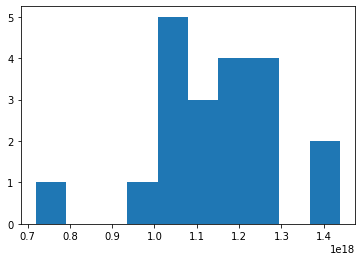

In [57]:
# M = 4 # number of variables
# phi = [ [1,-3,4], [-1,2] ]

M = 64
phi = [[55, 3, -50, -57, 2, 51, -5, -56, -45, 1], [28, -1, -26, 35, 42, -43, 45, -56, -11, 6], [-18, 43, 1, 64, -34, 28, 48, -13, 29, 49], [-21, 12, 7, -49, -25, -45, 8, -51, 5, -26], [6, -26, 27, 51, 2, 9, 49, 29, -42, -35], [-12, 4, -32, -60, 2, 56, 31, 58, -19, -46], [-10, -52, 25, -8, -56, -24, -51, 20, 36, 22], [-64, -26, -36, -14, 3, 42, -20, -59, 25, 33], [-31, -33, 40, -29, -12, -49, 28, 11, 7, 22], [-25, 23, -17, -61, 34, 32, 24, -52, -21, -26], [-48, -42, -43, -24, 14, 50, -64, 60, 7, -53], [-1, 2, -61, -24, -53, 34, -13, 36, -46, 3], [3, -52, 60, 39, 9, 59, 57, 32, 6, -7], [-17, -28, -58, 33, 16, -22, -13, 26, 18, -11], [47, -39, 46, 40, -18, 24, 6, -23, -64, -22], [-6, 60, 35, 1, 52, 18, -33, 43, 45, -11], [57, -34, -32, 16, -41, -25, 37, 40, 43, -5], [58, -51, -40, 42, 5, 27, -41, 20, 32, 30], [-48, -11, -15, -14, -27, 17, -33, 55, -64, -51], [-11, -8, 48, 57, 42, 64, 40, -45, 13, -25], [-40, -39, 46, -36, -51, -58, 14, 7, -18, -6], [31, 38, -11, -45, -14, -9, -63, 27, -35, -46], [40, 11, 28, -26, -25, -20, -41, 16, 61, -32], [-35, 6, -58, 30, 62, -36, -7, -37, 38, 51], [-13, 58, 1, 14, 52, 8, 45, -49, -21, 51], [10, -62, -39, -57, 15, -40, 56, -31, -47, 23], [37, 22, -21, 52, -5, -19, -7, 50, 34, 9], [18, 14, -31, 27, -2, 5, 3, 48, 63, -34], [-43, 39, -29, 34, 60, -10, -61, -49, -42, 57], [-32, -29, -16, 53, -38, 52, -36, -62, -5, 45], [-28, 25, -31, -41, -44, -37, 20, 48, 59, 24], [49, -59, -13, -56, -29, -2, -45, -62, -38, -26], [-33, -31, 53, 64, 15, 17, 12, 50, 46, -54], [56, 57, 22, 4, 46, 21, 49, 14, 43, -41], [-8, 18, -21, -15, -42, -64, 45, 14, 13, -33], [-32, 62, 2, 10, -49, -64, 15, -35, -20, -17], [54, -64, -20, 37, -5, -26, -41, -35, 32, -25], [60, 58, -23, -43, -2, 15, 10, 9, 59, -45], [9, 29, -17, 45, -53, 18, 19, 50, 42, -61], [54, -51, 9, -52, -40, -37, -18, -59, 48, 3], [-32, -17, 38, 12, -27, 45, 57, -51, 56, 4], [-12, 62, -17, -50, -32, -45, -56, 46, 19, -61], [51, -27, 56, 45, 59, -25, 3, -18, 60, -44], [-50, 5, -10, 12, -23, -41, 31, -59, -35, 30], [-5, 18, -4, -63, 22, -40, 10, -62, 61, -35], [1, -10, 31, -41, 56, -17, -61, 22, 46, -14], [-45, 32, 54, -48, -25, 10, 31, -63, 38, -17], [50, -46, 44, -57, -45, -1, -63, 15, 4, 12], [-39, -28, 49, -9, 53, 25, 47, -6, 24, -36], [-41, 59, 13, 15, 21, -20, -19, 2, -22, 37], [-31, 23, -57, -38, 30, 59, 28, 6, 53, 26], [-38, -62, 14, 26, 12, 46, 10, 35, -18, -43], [20, -10, -48, -62, -17, -27, 49, -11, 59, 7], [-43, -46, -14, -31, -62, 52, -10, 40, -63, 32], [15, -12, 43, -19, -34, -25, -14, 62, 50, 61], [24, -52, 32, 61, 18, -44, 49, 29, 55, -57], [-27, 25, 55, -57, 12, 9, -43, 29, 36, 18], [13, -27, 21, -24, -8, 39, -60, 34, -11, 54], [-51, -3, 12, 26, -9, -23, -18, 28, 24, 11], [-1, -10, 9, 35, -55, -30, 48, 53, -32, -24], [-59, -58, -30, -46, 17, 11, 3, -18, -1, -50], [-61, -52, 17, -4, -44, -56, 64, 37, -47, 46], [28, 59, -23, 29, -5, -41, 39, 57, 2, 34], [-54, 56, 5, -20, -6, 13, 49, 28, -42, 25]]


# This function can be vectorized further - it's a nice exercise
def estimate_dnf(N):
    success = 0
    for i in range(N):
        x = 2 * np.random.randint(2, size=M) - 1  # sample integers from {-1, 1}
        for clause in phi:
            mul = x[np.abs(clause) - 1] * clause  # vectorized way of checking satisfiability
            if (mul > 0).all():
                success += 1
                break  # as soon as we find a satisfied clausule we finish
    return 2 ** M * success / N  # why (2 ** M) here?


N = 1000
REP = 20


sample_dnf = [estimate_dnf(N) for _ in range(REP)]
plt.hist(sample_dnf);

**Problem 4d (Monte Carlo counting ctd).** In this problem we use a different distribution on assignments, to overcome the difficulties arising in **4c**. 
 * How many assignments satisfy clause $C_i$?
 * How can we estimate the probability that a random assignment which satisfies $C_i$ does not satisfy any earlier clauses (i.e., $C_j$ for $j < i$)?
 * How can we estimate the number of assignments which satisfy $C_i$ but do not satisfy any earlier clauses?
 * How can we use the result of the previous question to construct an algorithm estimating the number of satisfying assignments?


In [64]:
#M = 4 # number of variables
#phi = [ [1,-3,4], [-1,2] ]

M = 64
phi = [[55, 3, -50, -57, 2, 51, -5, -56, -45, 1], [28, -1, -26, 35, 42, -43, 45, -56, -11, 6], [-18, 43, 1, 64, -34, 28, 48, -13, 29, 49], [-21, 12, 7, -49, -25, -45, 8, -51, 5, -26], [6, -26, 27, 51, 2, 9, 49, 29, -42, -35], [-12, 4, -32, -60, 2, 56, 31, 58, -19, -46], [-10, -52, 25, -8, -56, -24, -51, 20, 36, 22], [-64, -26, -36, -14, 3, 42, -20, -59, 25, 33], [-31, -33, 40, -29, -12, -49, 28, 11, 7, 22], [-25, 23, -17, -61, 34, 32, 24, -52, -21, -26], [-48, -42, -43, -24, 14, 50, -64, 60, 7, -53], [-1, 2, -61, -24, -53, 34, -13, 36, -46, 3], [3, -52, 60, 39, 9, 59, 57, 32, 6, -7], [-17, -28, -58, 33, 16, -22, -13, 26, 18, -11], [47, -39, 46, 40, -18, 24, 6, -23, -64, -22], [-6, 60, 35, 1, 52, 18, -33, 43, 45, -11], [57, -34, -32, 16, -41, -25, 37, 40, 43, -5], [58, -51, -40, 42, 5, 27, -41, 20, 32, 30], [-48, -11, -15, -14, -27, 17, -33, 55, -64, -51], [-11, -8, 48, 57, 42, 64, 40, -45, 13, -25], [-40, -39, 46, -36, -51, -58, 14, 7, -18, -6], [31, 38, -11, -45, -14, -9, -63, 27, -35, -46], [40, 11, 28, -26, -25, -20, -41, 16, 61, -32], [-35, 6, -58, 30, 62, -36, -7, -37, 38, 51], [-13, 58, 1, 14, 52, 8, 45, -49, -21, 51], [10, -62, -39, -57, 15, -40, 56, -31, -47, 23], [37, 22, -21, 52, -5, -19, -7, 50, 34, 9], [18, 14, -31, 27, -2, 5, 3, 48, 63, -34], [-43, 39, -29, 34, 60, -10, -61, -49, -42, 57], [-32, -29, -16, 53, -38, 52, -36, -62, -5, 45], [-28, 25, -31, -41, -44, -37, 20, 48, 59, 24], [49, -59, -13, -56, -29, -2, -45, -62, -38, -26], [-33, -31, 53, 64, 15, 17, 12, 50, 46, -54], [56, 57, 22, 4, 46, 21, 49, 14, 43, -41], [-8, 18, -21, -15, -42, -64, 45, 14, 13, -33], [-32, 62, 2, 10, -49, -64, 15, -35, -20, -17], [54, -64, -20, 37, -5, -26, -41, -35, 32, -25], [60, 58, -23, -43, -2, 15, 10, 9, 59, -45], [9, 29, -17, 45, -53, 18, 19, 50, 42, -61], [54, -51, 9, -52, -40, -37, -18, -59, 48, 3], [-32, -17, 38, 12, -27, 45, 57, -51, 56, 4], [-12, 62, -17, -50, -32, -45, -56, 46, 19, -61], [51, -27, 56, 45, 59, -25, 3, -18, 60, -44], [-50, 5, -10, 12, -23, -41, 31, -59, -35, 30], [-5, 18, -4, -63, 22, -40, 10, -62, 61, -35], [1, -10, 31, -41, 56, -17, -61, 22, 46, -14], [-45, 32, 54, -48, -25, 10, 31, -63, 38, -17], [50, -46, 44, -57, -45, -1, -63, 15, 4, 12], [-39, -28, 49, -9, 53, 25, 47, -6, 24, -36], [-41, 59, 13, 15, 21, -20, -19, 2, -22, 37], [-31, 23, -57, -38, 30, 59, 28, 6, 53, 26], [-38, -62, 14, 26, 12, 46, 10, 35, -18, -43], [20, -10, -48, -62, -17, -27, 49, -11, 59, 7], [-43, -46, -14, -31, -62, 52, -10, 40, -63, 32], [15, -12, 43, -19, -34, -25, -14, 62, 50, 61], [24, -52, 32, 61, 18, -44, 49, 29, 55, -57], [-27, 25, 55, -57, 12, 9, -43, 29, 36, 18], [13, -27, 21, -24, -8, 39, -60, 34, -11, 54], [-51, -3, 12, 26, -9, -23, -18, 28, 24, 11], [-1, -10, 9, 35, -55, -30, 48, 53, -32, -24], [-59, -58, -30, -46, 17, 11, 3, -18, -1, -50], [-61, -52, 17, -4, -44, -56, 64, 37, -47, 46], [28, 59, -23, 29, -5, -41, 39, 57, 2, 34], [-54, 56, 5, -20, -6, 13, 49, 28, -42, 25]]

In [65]:
# Sprawdza, czy wystepuje sytuacja x_i AND ~x_i.
def is_clause_false(clause):
    s = set()
    for c in clause:
        if (-c in s):
            return True
        else:
            s.add(c)
    return False


def how_many_satisfying(clause):
    if (is_clause_false(clause)):
        return 0
    
    distinct_cnt = 0
    s = set()
    for c in clause:
        if (c in s):
            continue
        s.add(c)
        distinct_cnt += 1
    
    return 2 ** (M - distinct_cnt)


print(how_many_satisfying(phi[4]))

18014398509481984


In [69]:
N = 100000


# Sprawdza, czy wektor o wartościach 0 (false), 1 (true) spełnia klauzulę.
def satisfy_clause(clause, vector):
    for c in clause:
        if (c < 0 and vector[-c-1] == 1) or (c > 0 and vector[c-1] == 0):
            return False
    return True


def not_satisfy_earlier_prob(clauses, n):
    num_satisfying = np.zeros(M)
    num_first = np.zeros(M) # ile razy wzięliśmy i-tą klauzulę jako pierwszą
    
    for i in range(n):
        random_vector = np.random.choice(2, M)
        first = True
        for j, c in enumerate(clauses):
            if satisfy_clause(c, random_vector):
                num_satisfying[j] += 1
                if first:
                    num_first[j] += 1
                    first = False
    num_satisfying[num_satisfying == 0] = 1
    res = np.divide(num_first, num_satisfying)
    return res


print(not_satisfy_earlier_prob(phi, N))

[1.         1.         1.         1.         0.98969072 1.
 1.         1.         0.99074074 1.         0.97727273 0.96842105
 0.98901099 1.         0.98979592 1.         0.97938144 1.
 0.99047619 0.96969697 0.99065421 0.94186047 0.95959596 1.
 0.97826087 0.97560976 0.98947368 0.96       0.98876404 0.98058252
 0.97916667 0.98611111 0.94949495 0.95192308 0.96703297 0.9893617
 0.97959184 0.98969072 0.96938776 0.96116505 0.9375     0.96428571
 0.9787234  0.96039604 0.96521739 0.95180723 0.95       0.95918367
 0.95049505 0.97979798 0.96590909 0.95698925 0.9375     0.92079208
 0.94059406 0.9787234  0.88461538 0.92307692 0.94117647 0.94949495
 0.95652174 1.         0.92079208 0.96808511]


In [75]:
def estimate_number_assigments(clauses, n):
    return [how_many_satisfying(clause) for clause in clauses] * not_satisfy_earlier_prob(clauses, n)


print(estimate_number_assigments(phi, N))

[1.80143985e+16 1.80143985e+16 1.80143985e+16 1.80143985e+16
 1.77863681e+16 1.76776808e+16 1.80143985e+16 1.76807985e+16
 1.80143985e+16 1.78360381e+16 1.76184777e+16 1.80143985e+16
 1.78286831e+16 1.78360381e+16 1.80143985e+16 1.80143985e+16
 1.80143985e+16 1.76898148e+16 1.80143985e+16 1.75750229e+16
 1.80143985e+16 1.80143985e+16 1.64479291e+16 1.78286831e+16
 1.76838591e+16 1.72791169e+16 1.76504713e+16 1.80143985e+16
 1.74897073e+16 1.73148102e+16 1.77919985e+16 1.78305781e+16
 1.68395464e+16 1.76745042e+16 1.70135986e+16 1.78096894e+16
 1.71247986e+16 1.74394709e+16 1.69226168e+16 1.75139986e+16
 1.72791169e+16 1.78247733e+16 1.75954590e+16 1.65668129e+16
 1.71136786e+16 1.70245964e+16 1.67658758e+16 1.72532267e+16
 1.78267485e+16 1.60905307e+16 1.68134386e+16 1.76140785e+16
 1.71211226e+16 1.71666621e+16 1.70023536e+16 1.66548213e+16
 1.71565700e+16 1.69807855e+16 1.78096894e+16 1.70858213e+16
 1.76576777e+16 1.74793174e+16 1.69670498e+16 1.67781163e+16]


In [72]:
def satisfying_assignments(clauses, n):
    return np.sum(estimate_number_assigments(phi, n))


print(satisfying_assignments(phi, N))

1.1187788836975508e+18
